<a href="https://colab.research.google.com/github/Charanpoojary/Project-15-Cab-price-prediction/blob/main/Fair_amount_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement:**

## **1.Build an effective model that will estimate the fair price accurately.**





key - a unique identifier for each trip

fare_amount - the cost of each trip in usd

pickup_datetime - date and time when the meter was engaged

passenger_count - the number of passengers in the vehicle (driver entered value)

pickup_longitude - the longitude where the meter was engaged

pickup_latitude - the latitude where the meter was engaged

dropoff_longitude - the longitude where the meter was disengaged

dropoff_latitude - the latitude where the meter was disengaged

In [ ]:
#Importing required libraries

In [ ]:
import pandas as pd # Importing pandas 
import numpy as np  # Importing numpy
import seaborn as sns # Importing for Data Visualization
import matplotlib.pyplot as plt # Importing for Data Visualization

In [ ]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loading dataset
df = pd.read_csv('/content/drive/MyDrive/Datasets/trip.csv')

In [ ]:
#Returns the top 5 Rows
df.head()

,index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [ ]:
#Returns the bottom 5 rows
df.tail()

,index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1
199999,11951496,2010-05-15 04:08:00.00000076,14.1,2010-05-15 04:08:00 UTC,-73.984395,40.720077,-73.985508,40.768793,1


In [ ]:
# Returns the count of rows and columns
df.shape

(200000, 9)

In [ ]:
# Returns the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [ ]:
# returns the info about numerical columns
df.describe()

,index,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [ ]:
#checking for null values
df.isnull().sum()

index                0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [ ]:
# droping null values
df=df.dropna()

In [ ]:
# checking the dataset after removing teh null values
df.isnull().sum()

index                0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [ ]:
# Checking teh shape after removing null values
df.shape

(199999, 9)

In [ ]:
# checking the passenger count
df['passenger_count'].value_counts()

1      138425
2       29428
5       14009
3        8881
4        4276
6        4271
0         708
208         1
Name: passenger_count, dtype: int64

In [ ]:
#sorting values of fair amount
df['fare_amount'].sort_values(ascending=False)

170081    499.00
4292      350.00
185325    275.00
71715     250.00
197493    230.00
           ...  
92063     -23.70
89322     -49.57
164056    -50.50
111589    -52.00
98875     -52.00
Name: fare_amount, Length: 199999, dtype: float64

## **Removing values which are not within desired range(outlier) depending upon basic understanding of dataset.**

In [ ]:
sum(df['fare_amount']>450) # considring the fare amount above 450 as outlier dropping out the observation.

1

In [ ]:
sum(df['fare_amount']==0) # at the same time fare amount cannot be 0.

5

In [ ]:
sum(df['fare_amount']<1)  # fair amount cannot be less than one

25

In [ ]:
sum(df['passenger_count']>6) # checking for the passenger count above 6

1

In [ ]:
sum(df['passenger_count']<1)    # passenger count less than one makes no scense

708

In [ ]:
# the filtered observation which are not necessary

In [ ]:
df[df['fare_amount']<1],df[df['passenger_count']>6],df[df['passenger_count']<1],df[df['fare_amount']>450]

(           index                          key  fare_amount  \
 20744   25344154  2015-04-22 23:25:07.0000008         0.00   
 21658   46896458  2015-05-31 16:13:41.0000001         0.01   
 22182   22994576  2010-03-20 02:59:51.0000002         0.00   
 63395   30260042  2015-03-03 23:07:41.0000008        -5.00   
 71246   51325304  2010-02-11 21:47:10.0000001        -3.30   
 79903   50284253  2015-05-01 14:43:02.0000004        -3.50   
 87467   10649069  2015-01-04 03:51:13.0000002         0.00   
 89322   26673143  2010-03-09 08:26:10.0000006       -49.57   
 92063   10267585  2010-03-12 08:49:10.0000002       -23.70   
 98875   51135168  2015-03-20 21:31:14.0000007       -52.00   
 104080  21688700  2010-03-09 20:25:10.0000002        -7.30   
 111589  13971251  2015-02-23 19:26:44.0000004       -52.00   
 139272  40714150  2010-02-23 18:52:10.0000003        -6.90   
 148803  34933571  2010-02-12 10:50:10.0000005        -5.70   
 149342  46581076  2010-03-07 19:11:43.0000004         

In [ ]:
# Data cleaning. # by above experiments we can say that most of the data is corrupted and we need to clean it.

In [ ]:
df=df.drop(df[df['fare_amount']<1].index,axis=0)
df=df.drop(df[df['fare_amount']>453].index,axis=0)
df=df.drop(df[df['passenger_count']>6].index,axis=0)
df=df.drop(df[df['passenger_count']<1].index,axis=0)
df=df.drop(df[df['fare_amount']==0].index,axis=0)

In [ ]:
# after removing all the wrong data points.
# checking the data after cleaning.

In [ ]:
sum(df['fare_amount']<1),sum(df['passenger_count']>6),sum(df['passenger_count']<1),sum(df['fare_amount']>450,sum(df['fare_amount']==0))

(0, 0, 0, 0)

In [ ]:
df['passenger_count'].unique()   # unique passengers count

array([1, 3, 5, 2, 4, 6])

In [ ]:
# converting object type into datetime object
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC') 

In [ ]:
df['pickup_datetime']

0        2015-05-07 19:52:06
1        2009-07-17 20:04:56
2        2009-08-24 21:45:00
3        2009-06-26 08:22:21
4        2014-08-28 17:47:00
                 ...        
199995   2012-10-28 10:49:00
199996   2014-03-14 01:09:00
199997   2009-06-29 00:42:00
199998   2015-05-20 14:56:25
199999   2010-05-15 04:08:00
Name: pickup_datetime, Length: 199264, dtype: datetime64[ns]

In [ ]:
# now let us separate year month date day hour minute from pickup date

In [ ]:
df['year'] = df['pickup_datetime'].dt.year
df['Month'] = df['pickup_datetime'].dt.month
df['Date'] = df['pickup_datetime'].dt.day
df['Day'] = df['pickup_datetime'].dt.dayofweek
df['Hour'] = df['pickup_datetime'].dt.hour
df['Minute'] = df['pickup_datetime'].dt.minute

In [ ]:
# check the info after creating all the new features

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199264 entries, 0 to 199999
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   index              199264 non-null  int64         
 1   key                199264 non-null  object        
 2   fare_amount        199264 non-null  float64       
 3   pickup_datetime    199264 non-null  datetime64[ns]
 4   pickup_longitude   199264 non-null  float64       
 5   pickup_latitude    199264 non-null  float64       
 6   dropoff_longitude  199264 non-null  float64       
 7   dropoff_latitude   199264 non-null  float64       
 8   passenger_count    199264 non-null  int64         
 9   year               199264 non-null  int64         
 10  Month              199264 non-null  int64         
 11  Date               199264 non-null  int64         
 12  Day                199264 non-null  int64         
 13  Hour               199264 non-null  int64   

In [ ]:
# creating a function called distance
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a)) # 2*R*asin...

In [ ]:
# add new column to dataframe with distance in miles
df['distance_miles'] =distance(df.pickup_latitude, df.pickup_longitude, \
                                      df.dropoff_latitude, df.dropoff_longitude)

In [ ]:
df.groupby('passenger_count')['distance_miles', 'fare_amount'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,distance_miles,fare_amount
passenger_count,,
1,13.258886,11.252127
2,10.824747,11.786268
3,14.308563,11.499613
4,14.306832,11.642472
5,9.444155,11.213862
6,18.410538,12.158537


In [ ]:
#As we know that we have given pickup longitute and latitude values and same for drop. 
#So we need to calculate the distance Using the haversine formula and we will create a new variable called distance
from math import radians, cos, sin, asin, sqrt

def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [ ]:
df['distance'] = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1) 

In [ ]:
df['distance'].sort_values(ascending=False),df['distance'].sort_values(ascending=False) 

(75851     16409.239135
 139447    10321.507661
 65591      8782.898606
 34594      8776.106279
 140620     8708.233063
               ...     
 129751        0.000000
 6889          0.000000
 194381        0.000000
 194380        0.000000
 24661         0.000000
 Name: distance, Length: 199264, dtype: float64, 75851     16409.239135
 139447    10321.507661
 65591      8782.898606
 34594      8776.106279
 140620     8708.233063
               ...     
 129751        0.000000
 6889          0.000000
 194381        0.000000
 194380        0.000000
 24661         0.000000
 Name: distance, Length: 199264, dtype: float64)

In [ ]:
# distance travelled cannot be Zero , so removing those observation with ZERO distance travelled.
# at the same time how a person can travel 4000 to 5000 km in cab, thats not possible and removing it.
sum(df['distance']==0),sum(df['distance']>130)

(5612, 438)

In [ ]:
df=df.drop(df[df['distance']==0].index,axis=0)

In [ ]:
df=df.drop(df[df['distance']>130].index,axis=0)

In [ ]:
# deleting the feature
# Now we dont require location details because we have distance varibale

In [ ]:
#Returns the top 5 rows of the dataset
df.head()

,index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance_miles,distance
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,3,19,52,1.045968,1.683323
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,4,20,4,1.527076,2.457590
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,0,21,45,3.129460,5.036377
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,4,8,22,1.032522,1.661683
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,3,17,47,2.780916,4.475450


In [ ]:
# Unwanted columns
deletingthefeatures = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude','Minute','distance_miles','key']

In [ ]:
# removing unwanted columns
df = df.drop(deletingthefeatures, axis = 1)

In [ ]:
df.head()

,index,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
0,24238194,7.5,1,2015,5,7,3,19,1.683323
1,27835199,7.7,1,2009,7,17,4,20,2.457590
2,44984355,12.9,1,2009,8,24,0,21,5.036377
3,25894730,5.3,3,2009,6,26,4,8,1.661683
4,17610152,16.0,5,2014,8,28,3,17,4.475450


In [ ]:
# converting the data in required data type.
df['passenger_count'] = df['passenger_count'].astype('int64')
df['year']  = df['year'].astype('int64')
df['Month'] = df['Month'].astype('int64')
df['Date']  = df['Date'].astype('int64')
df['Day']   = df['Day'].astype('int64')
df['Hour']  = df['Hour'].astype('int64')

In [ ]:
df['passenger_count'].value_counts()  # passengers count

1    134154
2     28570
5     13562
3      8627
6      4154
4      4147
Name: passenger_count, dtype: int64

In [ ]:
#lets plot the graph for passengers counts

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count of Trips')

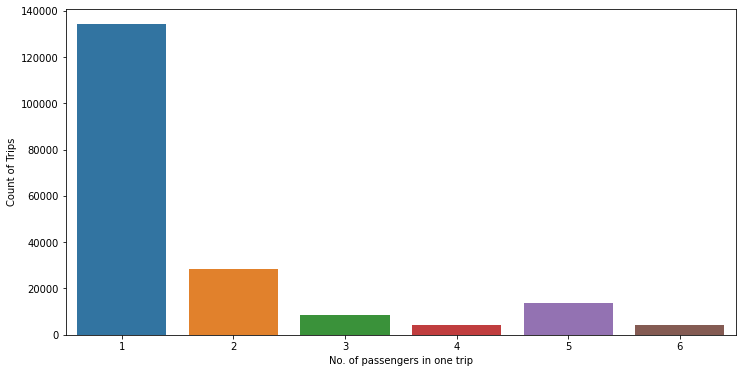

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(df['passenger_count'])
plt.xlabel('No. of passengers in one trip')
plt.ylabel('Count of Trips')

**Observations** :

By seeing the above plots we can easily conclude that:

1. single travelling passengers are most frequent travellers.



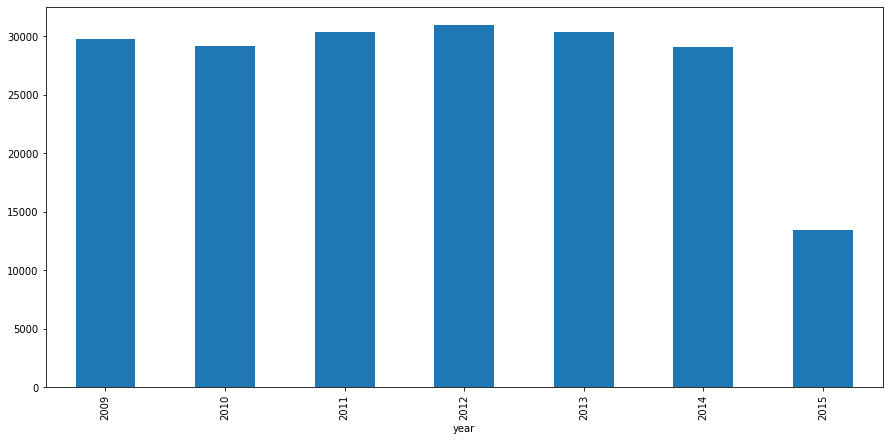

In [ ]:
# number of cabs with respect to years..
plt.figure(figsize=(15,7))
df.groupby(df["year"])['year'].count().plot(kind="bar")
plt.show()

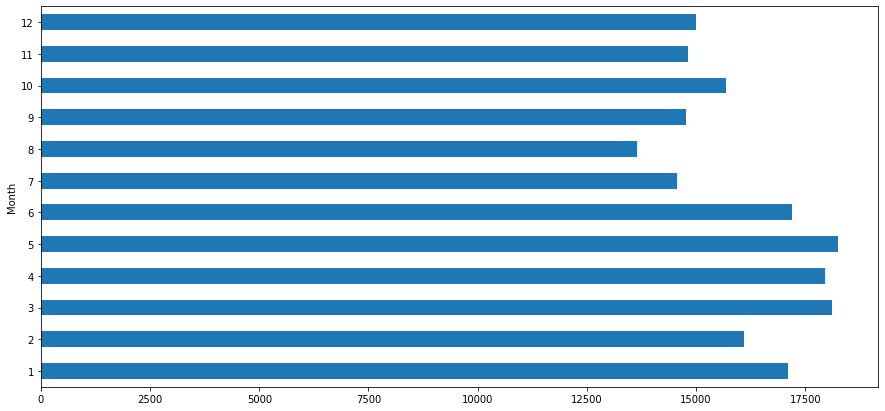

In [ ]:
# number of cabs with respect to month..
plt.figure(figsize=(15,7))
df.groupby(df["Month"])['Month'].count().plot(kind="barh")
plt.show()

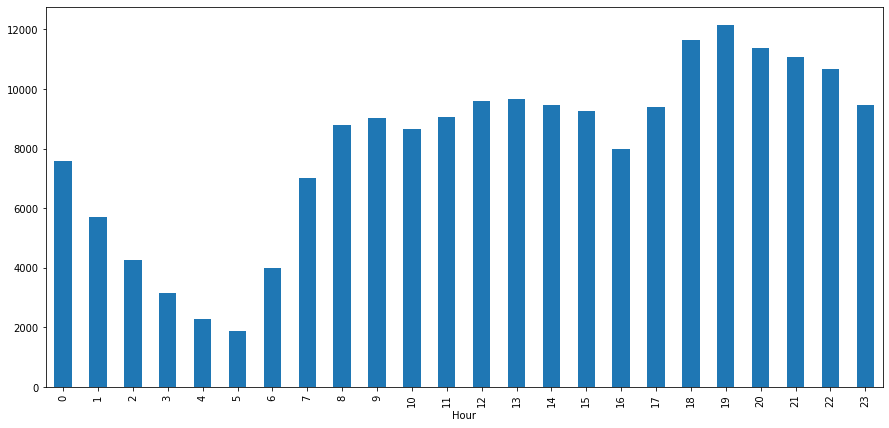

In [ ]:
# number of cabs with respect to hours..
plt.figure(figsize=(15,7))
df.groupby(df["Hour"])['Hour'].count().plot(kind="bar")
plt.show()

In [ ]:
df['Day'].value_counts()   # cab count on a daily basis

4    29830
5    29263
3    29028
2    28035
1    27188
6    25556
0    24314
Name: Day, dtype: int64

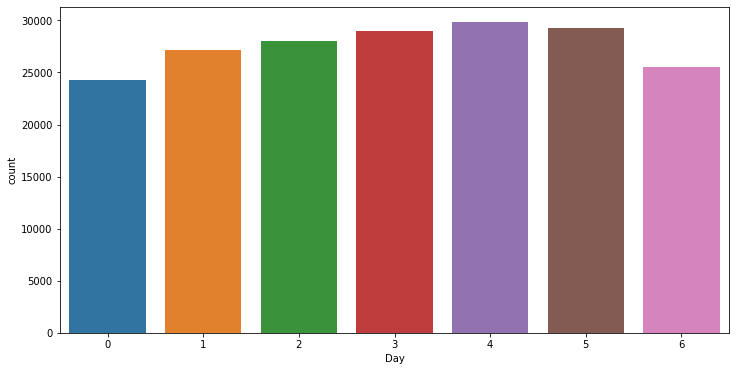

In [ ]:
#impact of Day on the number of cab rides
plt.figure(figsize=(12,6))
sns.countplot(x="Day",data=df)

In [ ]:
# checking the skewness of the data

fare_amount


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


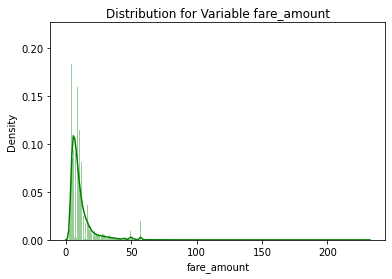

distance


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


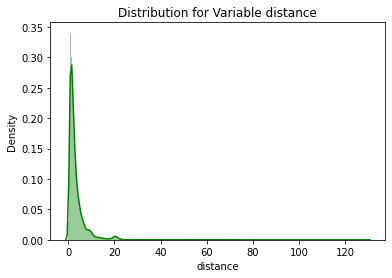

In [ ]:
for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(df[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [ ]:
# log transformation method

In [ ]:
#since skewness of target variable is high, apply log transform to reduce the skewness-
df['fare_amount'] = np.log1p(df['fare_amount'])

In [ ]:
#since skewness of distance variable is high, apply log transform to reduce the skewness-
df['distance'] = np.log1p(df['distance'])

In [ ]:
#Normality Re-check to check data is uniformly distributed or not after log transformartion

fare_amount


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


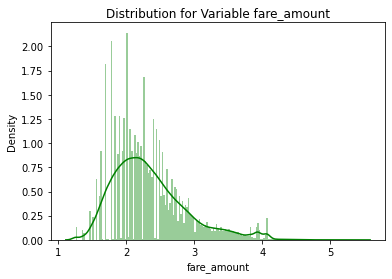

distance


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


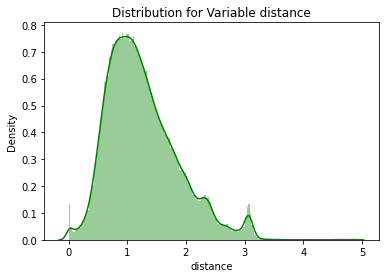

In [ ]:

for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(df[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

## **Corelation heatmap**

In [ ]:
numerical_val=df[['fare_amount','Date','distance','Hour','Day','passenger_count','year']]

In [ ]:
a=numerical_val.corr()

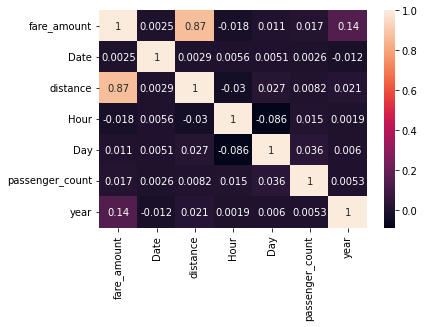

In [ ]:
sns.heatmap(a,annot=True)

## **Model Implimentation**

In [ ]:
# Required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor#ML algorithm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
x=df.drop(["fare_amount"],axis=1)   # independant variables
y=df['fare_amount']                  # dependant variables

In [ ]:
# train test split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [ ]:
#size of train and test datasets
print(f'Size of X_train is: {X_train.shape}')
print(f'Size of X_test is: {X_test.shape}')
print(f'Size of y_train is: {y_train.shape}')
print(f'Size of y_test is: {y_test.shape}')

Size of X_train is: (173892, 8)
Size of X_test is: (19322, 8)
Size of y_train is: (173892,)
Size of y_test is: (19322,)


## **Linear Regression**

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Prediction on  trainset
y_train_pred = model.predict(X_train)

In [ ]:
print(y_train_pred) 

[2.49244817 3.12023467 2.90599426 ... 2.44691224 2.62330344 1.96450939]


In [ ]:
# evaluation

In [ ]:
from sklearn import metrics

In [ ]:
# performance on training data 
train_score = model.score(X_train, y_train)

In [ ]:
print(train_score) # printing Train score

0.9732984925186747


In [ ]:
# r2 score

In [ ]:
r2score=metrics.r2_score(y_train, y_train_pred)

In [ ]:
print(r2score)   # printing r2 score

0.777036293545895


In [ ]:
# mean absolute error

In [ ]:
MAE=metrics.mean_absolute_error(y_train, y_train_pred)

In [ ]:
print(MAE)     # printing MAE

0.17135357204412482


In [ ]:
# model prediction for test data

In [ ]:
# predicting the data
y_test_pred=model.predict(X_test)
print(y_test_pred)          # printing the predicted value

[2.71315109 2.36997934 1.79758784 ... 1.82453747 2.3146724  3.12985106]


In [ ]:
# evaluation

In [ ]:
# R squarred error 

In [ ]:
r2score=metrics.r2_score(y_test, y_test_pred)

In [ ]:
print(r2score)   # printing r2 score

0.765583895254401


In [ ]:
# performamce on test data
test_score = model.score(X_test,y_test)

In [ ]:
print(test_score)   # printing test score

0.8026314018682876


In [ ]:
# mean absolute error

In [ ]:
MAE=metrics.mean_absolute_error(y_test, y_test_pred)

In [ ]:
print(MAE)     # printing MAE

0.1729359953415205


In [ ]:
from xgboost import XGBRegressor

## **XGBRegressor**

In [ ]:
model=XGBRegressor()   # initiating the model
model.fit(X_train, y_train)  # fitting the data

[09:42:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
# predicting the data
Y_train_pred=model.predict(X_train)
print(Y_train_pred)          # printing the predicted value

[2.5473683 3.1515143 2.8339531 ... 2.3532069 2.6349149 1.9837676]


In [ ]:
# evaluation

In [ ]:
# performance on training data 
train_score = model.score(X_train, y_train)

In [ ]:
print(train_score) # printing Train score

0.8219772992143161


In [ ]:
# R squarred error 

In [ ]:
r2score=metrics.r2_score(y_train, y_train_pred)

In [ ]:
print(r2score)   # printing r2 score

0.777036293545895


In [ ]:
# mean absolute error

In [ ]:
MAE=metrics.mean_absolute_error(y_train, y_train_pred)

In [ ]:
print(MAE)     # printing MAE

0.17135357204412482


In [ ]:
# model prediction for test data

In [ ]:
# predicting the data
y_test_pred=model.predict(X_test)
print(y_test_pred)          # printing the predicted value

[2.6322067 2.3616347 1.893456  ... 1.8732785 2.3575048 3.2670448]


In [ ]:
# evaluation

In [ ]:
# performamce on test data
test_score = model.score(X_test,y_test)

In [ ]:
print(test_score)   # printing test score

0.8106321960574726


In [ ]:
# R squarred error 

In [ ]:
r2score=metrics.r2_score(y_test, y_test_pred)

In [ ]:
print(r2score)   # printing r2 score

0.8106321960574726


In [ ]:
# mean absolute error

In [ ]:
MAE=metrics.mean_absolute_error(y_test, y_test_pred)

In [ ]:
print(MAE)     # printing MAE

0.15775970978594003


## **Random Forest Regressor**

In [ ]:
 from sklearn.ensemble import RandomForestRegressor

In [ ]:
model=RandomForestRegressor()   # initiating the model
model.fit(X_train, y_train)  # fitting the data

RandomForestRegressor()

In [ ]:
# predicting the data
y_train_pred=model.predict(X_train)
print(y_train_pred)          # printing the predicted value

[2.67375175 3.35417628 2.86521541 ... 2.29063979 2.69868905 1.91800447]


In [ ]:
# evaluation

In [ ]:
# performance on training data 
train_score = model.score(X_train, y_train)

In [ ]:
print(train_score) # printing Train score

0.9734169042685402


In [ ]:
# R squarred error 

In [ ]:
r2score=metrics.r2_score(y_train, y_train_pred)

In [ ]:
print(r2score)   # printing r2 score

0.9732984925186747


In [ ]:
# mean absolute error

In [ ]:
MAE=metrics.mean_absolute_error(y_train, y_train_pred)

In [ ]:
print(MAE)     # printing MAE

0.06005409989809973


In [ ]:
# model prediction for test data

In [ ]:
# predicting the data
y_test_pred=model.predict(X_test)
print(y_test_pred)          # printing the predicted value

[2.63630614 2.31732014 1.96784955 ... 1.93260435 2.40939569 3.42328663]


In [ ]:
# evaluation

In [ ]:
# performamce on test data
test_score = model.score(X_test,y_test)

In [ ]:
print(test_score)   # printing test score

0.8022530089202806


In [ ]:
# R squarred error 

In [ ]:
r2score=metrics.r2_score(y_test, y_test_pred)

In [ ]:
print(r2score)   # printing r2 score

0.8026314018682876


In [ ]:
# mean absolute error

In [ ]:
MAE=metrics.mean_absolute_error(y_test, y_test_pred)

In [ ]:
print(MAE)     # printing MAE

0.1621644819218503


# **Conclusion**

We calculate the numbers of cabs with respect to Hours, weekly, monthly, day  wise and yearly.

1. It shows very less cab counts on weekend and high counts during working days.

2. In the months of March, April and May we have a high number of cabs  count.

3. Use of these cabs in year 2012 and 2013 was much higher than other years.


4. single travelling passengers are most frequent travellers.

5. Linear Regression, Random forest and XGboost are used to train the model.
Both models performed well but Linear Regression performed better. It gave R-squared score of 81% and 0.17 mae. 
